In [1]:
import FIRE_files as ff
import simulationFiles
import time, importlib
import pylab as pl, numpy as np, glob, pdb
from numpy import log10 as log

ModuleNotFoundError: No module named 'FIRE_files'

In [ ]:

resolution = 7100
simgroup = 'md'
simname1 = 'm12b'
sfrs = (7.2,9.1,11.)

In [ ]:
snapshots = np.arange(590,550,-1)
Mdot_0 = np.ones((len(snapshots),ff.Snapshot_profiler.log_r2rvir_bins.shape[0]-1))*np.nan
Mdot_1 = np.ones((len(snapshots),ff.Snapshot_profiler.log_r2rvir_bins.shape[0]-1))*np.nan

In [ ]:
for i,iSnapshot in enumerate(snapshots):
    meta1 = ff.Snapshot_meta(simname1,simgroup,resolution, iSnapshot=iSnapshot,
                                 **simulationFiles.simulationFiles_dic[(simname1,resolution,simgroup)])
    snapshot1 = ff.Snapshot(meta1,pr=False,loadAll=False)
    prof1 = ff.Snapshot_profiler(snapshot1)
    prof1.load(loadAll=True)
    print (iSnapshot, prof1.z,ff.cosmo.age(0)-ff.cosmo.age(prof1.z))
    Mdot_0[i,:] = prof1.MdotProfile([1e5,1e10],suffix='_hot')
    Mdot_1[i,:] = prof1.MdotProfile([0,1e5],suffix='_cool')
    prof1.tofile()

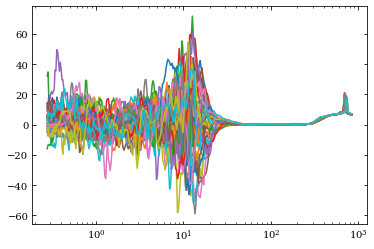

In [5]:
for i,x in enumerate(snapshots):
    pl.semilogx(prof1.rs_midbins(),-Mdot_1[i,:])

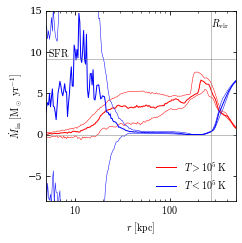

In [8]:

pl.figure(figsize=(ff.pB.fig_width_half,3.5))
ax=pl.subplot(111)
for i,Mdot in enumerate((Mdot_0,Mdot_1)):
    for ip,p in enumerate((16,50,84)):
        med = -np.nanpercentile(Mdot,p,axis=0)
        label = ('_',r'$T%s10^5\,{\rm K}$'%('><'[i]))[ip==1]
        pl.plot(prof1.rs_midbins(),med,c='rb'[i],label=label,lw=(0.5,1)[ip==1])
pl.axhline(sfrs[1],c='.5',lw=0.5)
pl.text(5.2,sfrs[1]+0.25,r'${\rm SFR}$')
pl.semilogx()
pl.axvline(prof1.rvir,c='.5',ls='-',lw=0.5)
pl.text(prof1.rvir,13,r'$R_{\rm vir}$')
pl.axhline(0,c='.5',ls='-',lw=0.5)
pl.xlim(5,500)
pl.ylim(-8,15)
ax.xaxis.set_major_formatter(ff.u.arilogformatter)
pl.xlabel(r'$r\ [{\rm kpc}]$')
pl.ylabel(r'$\dot{M}_{\rm in}\ [{\rm M}_\odot\ {\rm yr}^{-1}]$')
ff.u.mylegend(loc='lower right')
pl.savefig(ff.figDir+'Mdot_%s.pdf'%simname1,bbox_inches='tight')